
# Effect of GP firing rate on SNr response time

## Mapping input excitatory current to 1) firing rate of GPe and 2) net inhibition to SNr

Simulations are performed with constant current injection for steady-state solution.

### 1) Firing rate of GPe is proportional to excitatory input current (above 30pA).

In [33]:
Igp_range = 10:10:100; % pA 
fr_gp=[];
for i = 1:length(Igp_range)

spk_gp=[];
Isnr_net=[];
dt=0.0001; % 0.1ms integration steps

%Runs 5s simulation without external current measure the baseline activity.  
[g_gp2snr] = BGdelayline_setinit2('I_exc_gp',Igp_range(i),'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

for l = 1:10
%Silent striatum, testing different constant excitatory input to GPe
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('stimCellsPer',0,'I_exc_gp',Igp_range(i),'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr);

meanIsnr = mean(mean(Isnr(:,end-1/dt:end))); %average net inhibition exerted by GPe to SNr
Isnr_net = [Isnr_net, meanIsnr]; %makes an array of average inhibition across trials
spk_gp = [spk_gp; Vm_gp==15]; %binary spike array
end

fr_gp(i) = sum(sum(spk_gp(:,end-1/dt:end)))/size(spk_gp,1); %average GPe firing rate during the last 1s in simulation - from 100 cells.

y(i) = mean(Isnr_net);
e(i) = std(Isnr_net);

end


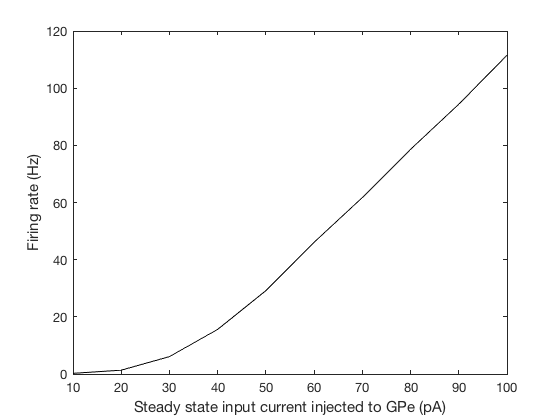

In [34]:
plot(Igp_range,fr_gp,'k')
xlabel('Steady state input current injected to GPe (pA)')
ylabel('Firing rate (Hz)')

### 2) Net inhibitory current to SNr is proportional to excitatory input current (above 30pA).

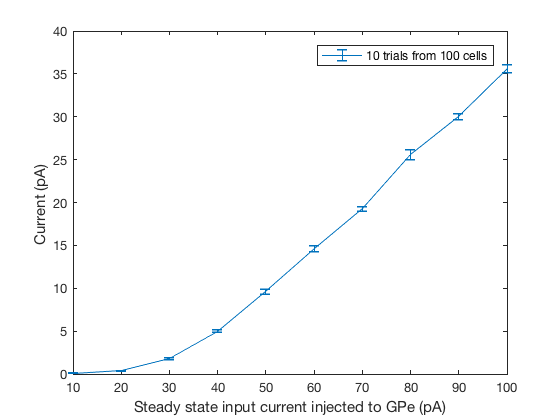

In [35]:
errorbar(Igp_range,y,e./sqrt(10)) % plotting mean and stanard error of the mean
legend('10 trials from 100 cells')
xlabel('Steady state input current injected to GPe (pA)')
ylabel('Current (pA) ')

Thus, injected current to GPe is proportional to firing rate of GPe as well as net inhibition to SNr

## Mapping the parameter space that control the net inhibitory current to SNr. 

1) Sweep across 10-100 pA of excitatory input to GPe -- to control firing rate. 

2) Also test synaptic transmission probabilities rainging from 0 to 1 in increment of 0.1. 

In [36]:
% excitatory input to GPe test range
gp_in = 10:10:100; %pA

% gp2snr synaptic transmission test range
P_gp2snr = 0:0.1:1;

fr_gp = zeros(length(gp_in),length(P_gp2snr));
I_tot_snr_mean = zeros(length(gp_in),length(P_gp2snr));
I_tot_snr_std = zeros(length(gp_in),length(P_gp2snr));
for param1 = 1:length(gp_in)
    for param2 = 1:length(P_gp2snr)
    
        spk_gp=[];
        Isnr_net=[];
        dt=0.0001; % 0.1ms integration steps

        %Runs 5s simulation without any stimulus to measure steady-state values. 
        [g_gp2snr] = BGdelayline_setinit2('I_exc_gp',gp_in(param1),'prob_syn_gp2snr',P_gp2snr(param2)); % initial conductance of gp to snr synapses 

        for l = 1:10
        %Silent striatum, testing different constant excitatory input to GPe and probability of transmission
        [Vm_gp,~,~,~, Isnr] = BGdelayline('stimCellsPer',0,'I_exc_gp',gp_in(param1),'prob_syn_gp2snr',P_gp2snr(param2),'g_gp2snr_i',g_gp2snr);

        meanIsnr = mean(mean(Isnr(:,end-1/dt:end))); %average net inhibition exerted by GPe to SNr
        Isnr_net = [Isnr_net, meanIsnr];
        spk_gp = [spk_gp; Vm_gp==15];
        end
        
        fr_gp(param1,param2) = sum(sum(spk_gp(:,end-1/dt:end)))/size(spk_gp,1);
        I_tot_snr_mean(param1,param2) = mean(Isnr_net);
        I_tot_snr_std(param1,param2) = std(Isnr_net);
     end
    
end


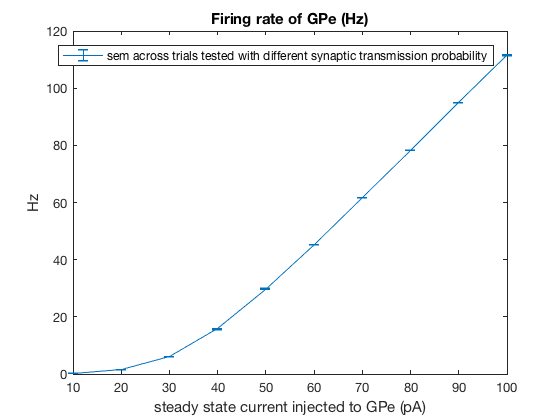

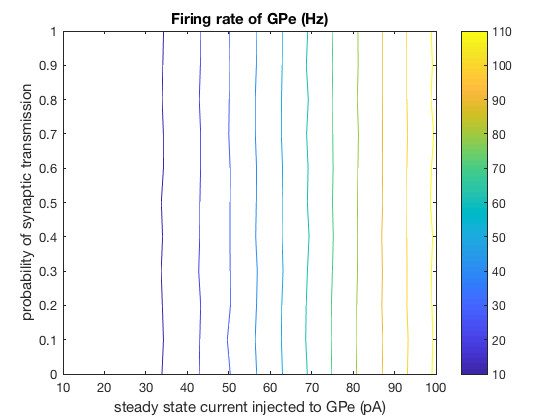

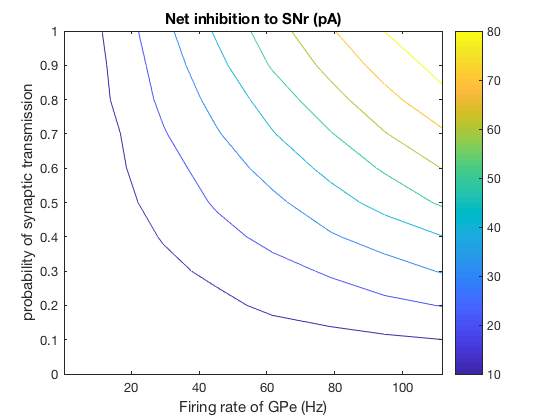

In [37]:
%figure;surfc(fr_gp(:,1),P_gp2snr,I_tot_snr_mean')
figure;contour(fr_gp(:,1),P_gp2snr,I_tot_snr_mean');colorbar
title('Net inhibition to SNr (pA)')
xlabel('Firing rate of GPe (Hz)')
ylabel('probability of synaptic transmission')

figure;contour(gp_in,P_gp2snr,fr_gp');colorbar
title('Firing rate of GPe (Hz)')
xlabel('steady state current injected to GPe (pA)')
ylabel('probability of synaptic transmission')

figure;errorbar(gp_in,mean(fr_gp,2),std(fr_gp,0,2)/sqrt(length(P_gp2snr)));
title('Firing rate of GPe (Hz)')
legend('sem across trials tested with different synaptic transmission probability')
xlabel('steady state current injected to GPe (pA)')
ylabel('Hz')


The plot reveals isoclines of net inhibitory current to SNr. The lines indicate combination of firing rate of GPe and probability of synaptic transmission that correspond to the same amount of GABAergic current. 

Next, I will look at how total net inhibition affects SNr firing depending on the net excitation. Total net inhibition is controlled by firing rate of GPe and release probability from GPe to SNr.


## Mapping net inhibitory current to SNr firing

I predict that increasing inhibitory current will linearly decrease SNr firing.

In [38]:
Isnr_inh = 10:10:100; % pA, inhibitory
Isnr_exc = 50:10:100;   % pA, excitatory
fr_snr = zeros(length(Isnr_inh),length(Isnr_exc));

for m = 1:length(Isnr_exc)
for i = 1:length(Isnr_inh)

spk_snr=[];
dt=0.0001; % 0.1ms integration steps

for l = 1:10
%%Simulation
Vm_snr = BGdelayline_Isnr2snrfr('Iexc_snr',Isnr_exc(m),'Igaba_snr',Isnr_inh(i));
spk_snr = [spk_snr; Vm_snr==15];
end

fr_snr(i,m) = sum(sum(spk_snr(:,end-1/dt:end)))/size(spk_snr,1); %average GPe firing rate during the last 1s in simulation - from 100 cells.

end
end



ans =

  -16.3060
  -16.5630
  -16.6400
  -15.6740
  -13.6650
   -9.7670
   -4.8030
   -1.2210
   -0.1940


ans =

   13.8660   15.6130   16.4190   16.5910   16.4040



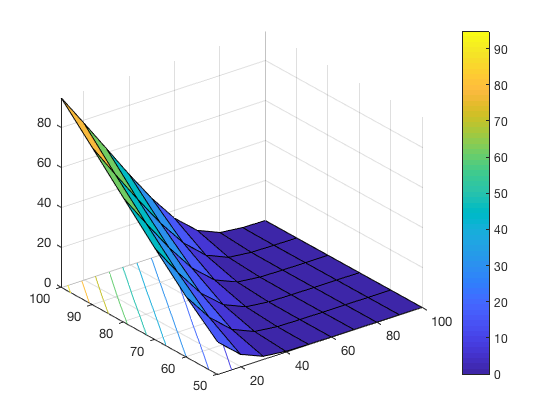

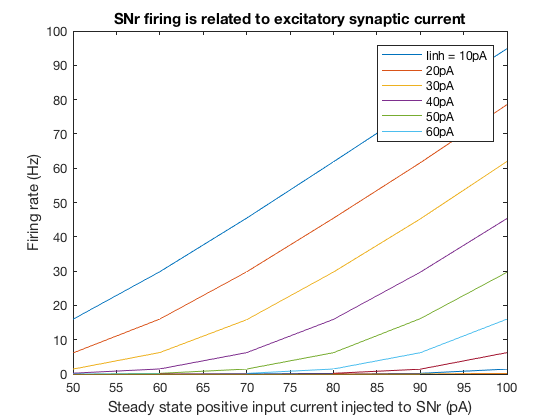

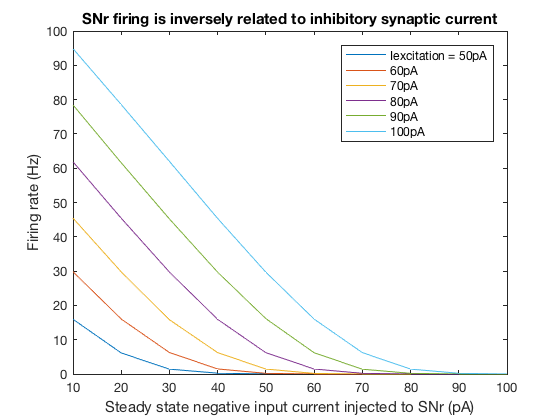

In [60]:
plot(Isnr_inh,fr_snr)
legend('Iexcitation = 50pA','60pA','70pA','80pA','90pA','100pA')
xlabel('Steady state negative input current injected to SNr (pA)')
ylabel('Firing rate (Hz)')
title('SNr firing is inversely related to inhibitory synaptic current' )
diff(fr_snr(:,6))

figure
plot(Isnr_exc,fr_snr')
legend('Iinh = 10pA','20pA','30pA','40pA','50pA','60pA')
xlabel('Steady state positive input current injected to SNr (pA)')
ylabel('Firing rate (Hz)')
title('SNr firing is related to excitatory synaptic current' )
diff(fr_snr(1,:))

figure
surfc(Isnr_inh,Isnr_exc,fr_snr');colorbar


The plot reveals that minimal current required for repetitive firing is ~10pA (Iinh + Iexc). 

## How does net inhibition affect SNr response time?

I apply constant excitation (100pA) and inhibition (varying, 10pA to 100pA) until stimulus time t = 1s, at which I will remove inhibition (Iinh = 0pA) for 10ms. I will determine whether SNr response time differs. 

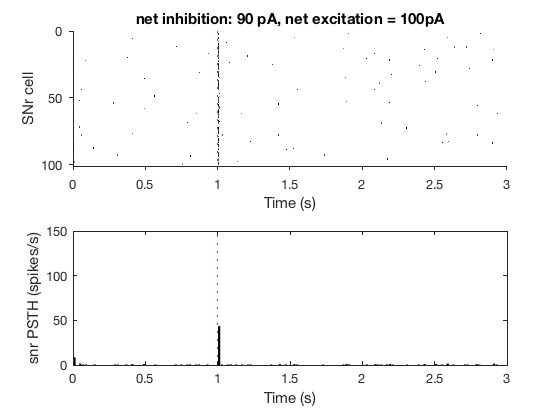

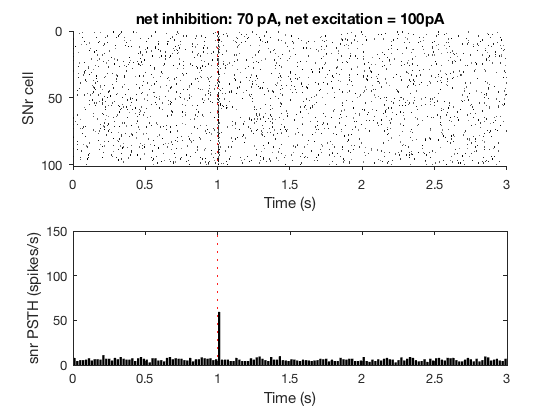

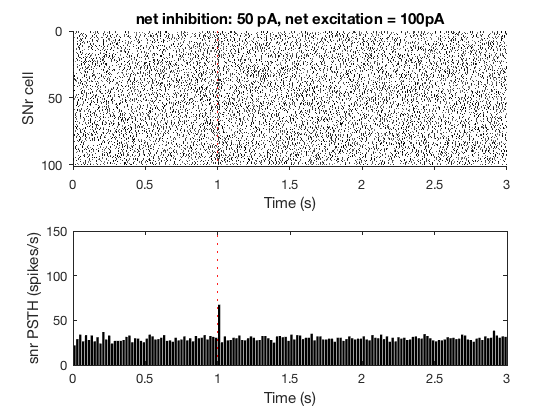

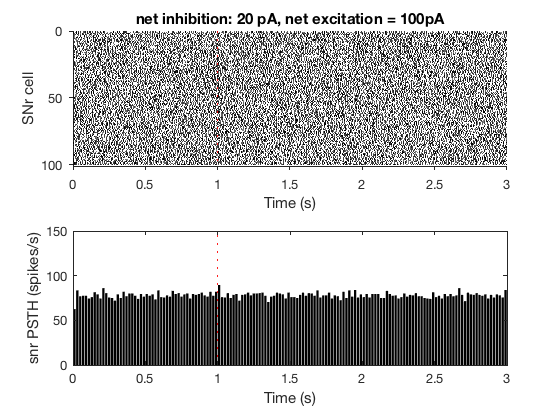

In [2]:
Isnr_inh = [20,50,70,90]; % pA, inhibitory
%fr_snr = zeros(length(Isnr_inh),length(Isnr_exc));



for i = 1:length(Isnr_inh)

spk_snr=[];
dt=0.0001; % 0.1ms integration steps

Vm_snr = BGdelayline_SNrdelay('Iexc_snr',100,'Igaba_snr',Isnr_inh(i)); % only SNr layer. 100 neurons
spk_snr = [spk_snr; Vm_snr==15];

binWidth_snr = 200; %ms

t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_i = 1:length(t_bar_snr)-1

    psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar_snr(psth_i):(t_bar_snr(psth_i)+binWidth_snr-1))));
   

end
figure(i)
subplot(2,1,1)
plotRaster(spk_snr);
vline(1)
%xlabel('Time (ms)')
ylabel('SNr cell')
%xlim([0.9 1.2])
%xticks([0.9 1 1.1 1.2])
%xticklabels({'-100','0','100','200'})

title(sprintf('net inhibition: %d pA, net excitation = 100pA',Isnr_inh(i)))
subplot(2,1,2)
h=bar((binWidth_snr/2+t_bar_snr-1)*0.0001,psth_snr/(size(spk_snr,1)*(binWidth_snr*0.0001)));
h.FaceColor = 'k';
xlim([0 3])
%xlim([0.9 1.2])
%xticks([0.9 1 1.1 1.2])
%xticklabels({'-100','0','100','200'})
ylim([0 150])
vline(1)
xlabel('Time (s)')
ylabel('snr PSTH (spikes/s)')
end


The peristimulus time histogram (PSTH) from 100 SNr neurons at various net inhibition (which changes SNr basal firing rates) reveal that SNr response time is inversely related to GPe firing rate. 

Then I varied excitation and inhibition to maintain basal firing rate at about ~5 Hz to compare their delay

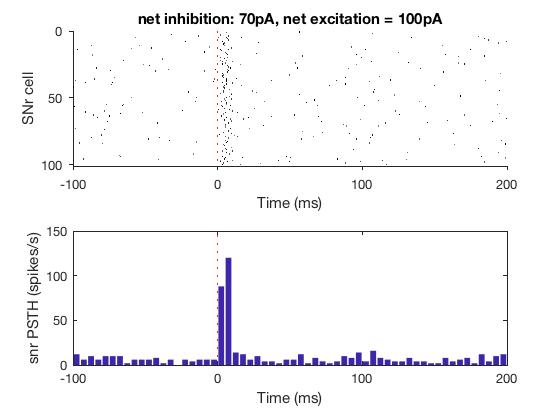

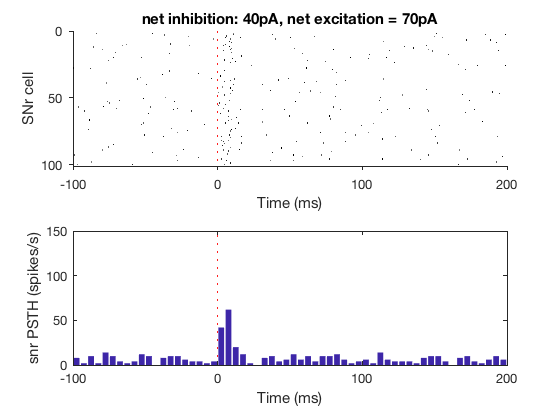

In [68]:
Isnr_inh = [40,70]; % pA, inhibitory
Isnr_exc = [70,100]; 
%fr_snr = zeros(length(Isnr_inh),length(Isnr_exc));

for i = 1:length(Isnr_inh)

spk_snr=[];
dt=0.0001; % 0.1ms integration steps

Vm_snr = BGdelayline_SNrdelay('Iexc_snr',Isnr_exc(i),'Igaba_snr',Isnr_inh(i)); % only SNr layer. 100 neurons
spk_snr = [spk_snr; Vm_snr==15];

binWidth_snr = 50; %ms

t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_i = 1:length(t_bar_snr)-1

    psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar_snr(psth_i):(t_bar_snr(psth_i)+binWidth_snr-1))));

end
figure(i)
subplot(2,1,1)
plotRaster(spk_snr);
vline(1)
xlabel('Time (ms)')
ylabel('SNr cell')
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})

title(sprintf('net inhibition: %dpA, net excitation = %dpA',Isnr_inh(i),Isnr_exc(i)))
subplot(2,1,2)
bar((binWidth_snr/2+t_bar_snr-1)*0.0001,psth_snr/(size(spk_snr,1)*(binWidth_snr*0.0001)))
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
xlabel('Time (ms)')
ylim([0 150])
vline(1)
ylabel('snr PSTH (spikes/s)')
end

Then I held inhibition at a constant value and varied excitation to observe difference in firing rate delay. I predicted that higher the excitation, longer the delay.

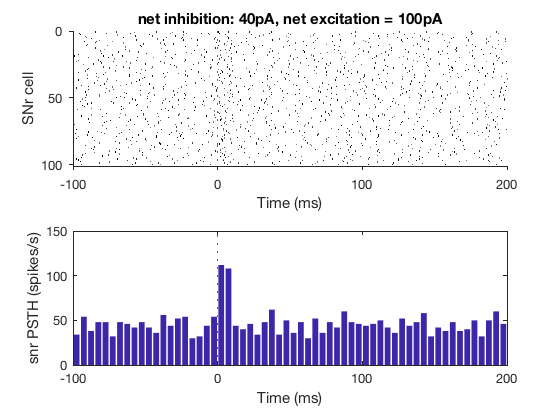

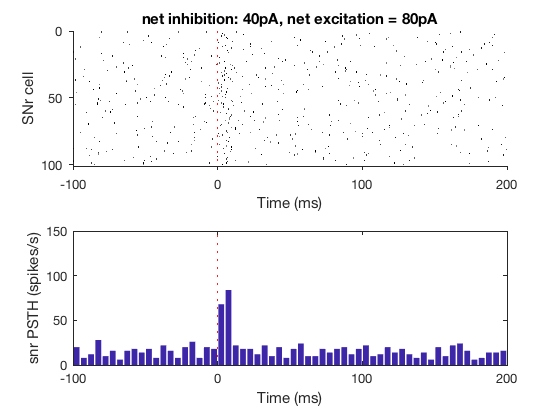

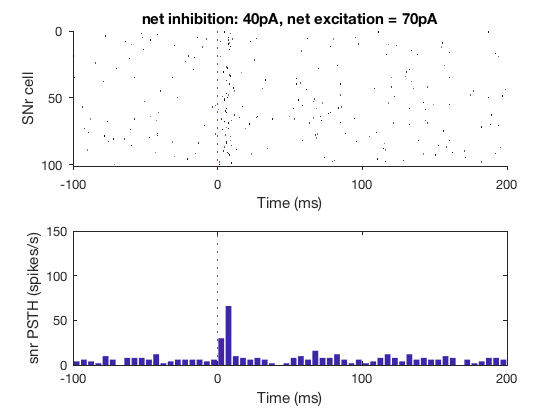

In [62]:
Isnr_inh = [40,40,40]; % pA, inhibitory
Isnr_exc = [70,80,100]; 
%fr_snr = zeros(length(Isnr_inh),length(Isnr_exc));

for i = 1:length(Isnr_inh)

spk_snr=[];
dt=0.0001; % 0.1ms integration steps

Vm_snr = BGdelayline_SNrdelay('Iexc_snr',Isnr_exc(i),'Igaba_snr',Isnr_inh(i)); % only SNr layer. 100 neurons
spk_snr = [spk_snr; Vm_snr==15];

binWidth_snr = 50; %ms

t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_i = 1:length(t_bar_snr)-1

    psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar_snr(psth_i):(t_bar_snr(psth_i)+binWidth_snr-1))));

end
figure(i)
subplot(2,1,1)
plotRaster(spk_snr);
vline(1)
xlabel('Time (ms)')
ylabel('SNr cell')
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})

title(sprintf('net inhibition: %dpA, net excitation = %dpA',Isnr_inh(i),Isnr_exc(i)))
subplot(2,1,2)
bar((binWidth_snr/2+t_bar_snr-1)*0.0001,psth_snr/(size(spk_snr,1)*(binWidth_snr*0.0001)))
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
xlabel('Time (ms)')
ylim([0 150])
vline(1)
ylabel('snr PSTH (spikes/s)')
end

### Response time of SNr at various excitatory input currents.

I plotted the latency of maximum instantaneous firing rate across varying inhibitory and excitatory input currents to SNr. 

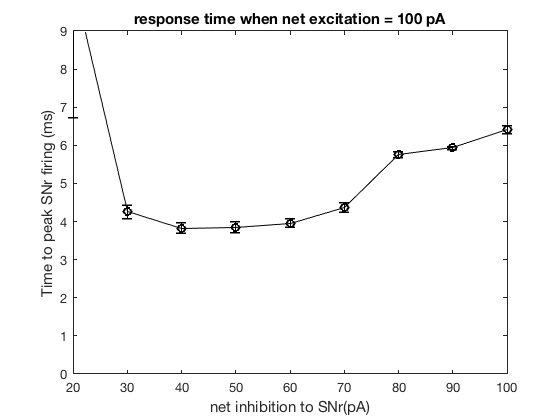

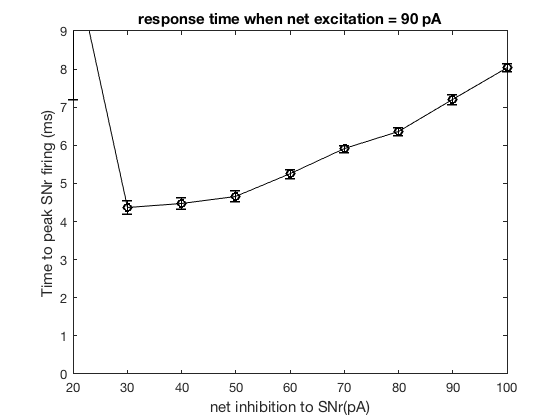

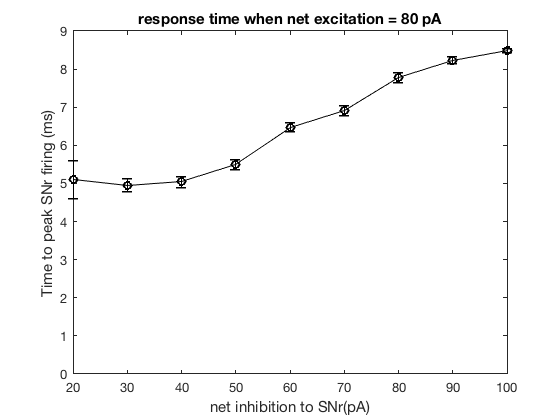

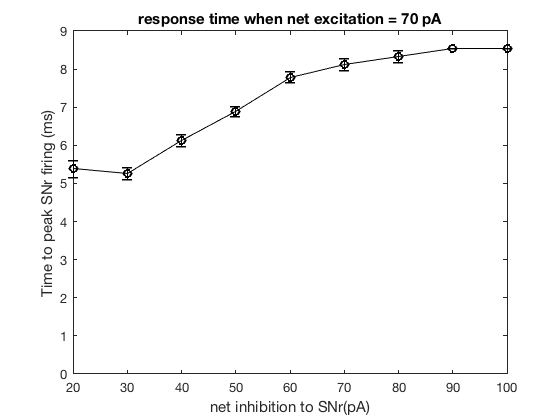

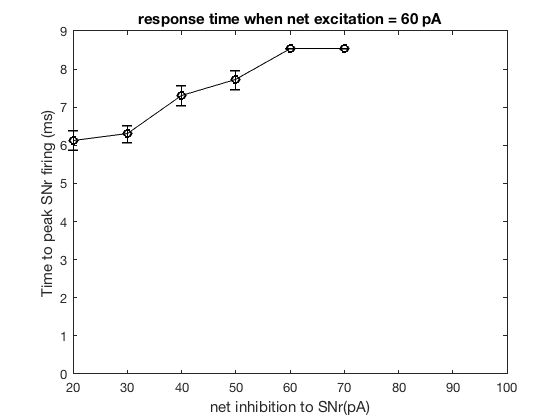

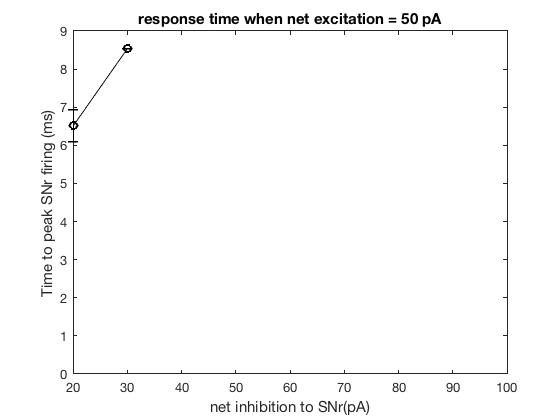

In [44]:
Isnr_inh = 20:10:100; % pA, inhibitory
Isnr_exc = 50:10:100;   % pA, excitatory

for m = 1:length(Isnr_exc)
tdelay = zeros(10,length(Isnr_inh));

for sim_i = 1:100 % number of simulations
for i = 1:length(Isnr_inh)

spk_snr=[];
dt=0.0001; % 0.1ms integration steps

Vm_snr = BGdelayline_SNrdelay('Iexc_snr',Isnr_exc(m),'Igaba_snr',Isnr_inh(i)); % only SNr layer. 100 neurons
spk_snr = [spk_snr; Vm_snr==15];

% Peristimulus time histogram 
binWidth_snr = 30; %0.1ms, bin size
t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_i = 1:length(t_bar_snr)-1
    psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar_snr(psth_i):(t_bar_snr(psth_i)+binWidth_snr-1))));
end

%% z-score
%mean_fr = mean(psth_snr(2:1/dt/binWidth_snr)/(size(spk_snr,1)*(binWidth_snr*0.0001))); % mean before stim
%std_fr = std(psth_snr(2:1/dt/binWidth_snr)/(size(spk_snr,1)*(binWidth_snr*0.0001)));  % std before stim
%z_snr{sim_i,i} = (psth_snr((1/dt/binWidth_snr-1000):end)/(size(spk_snr,1)*(binWidth_snr*0.0001))-mean_fr)/std_fr ; % z-score
binloc = (binWidth_snr/2+t_bar_snr-1)*0.0001;

%bar_idx = find((binloc)>0.95 & (binloc)<1.2);

[M,I]=max(psth_snr);

if binloc(I)>1 & binloc(I)<1.2
tdelay(sim_i,i) = binloc(I);
else
tdelay(sim_i,i) = NaN;
end


end
end

figure(m)
e=errorbar(Isnr_inh,nanmean(tdelay,1),nanstd(tdelay,1)./sqrt(sum(~isnan(tdelay),1)));
e.Color = 'k';
e.Marker = 'o';
xlabel('net inhibition to SNr(pA)')
ylabel('Time to peak SNr firing (ms)' )
xlim([20 100])
ylim([1 1.01])
yticks(linspace(1,1.01,10))
yticklabels({'0','1','2','3','4','5','6','7','8','9'})
title(sprintf('response time when net excitation = %d pA',Isnr_exc(m)))

end

This plot reveals that, when SNr can be disinhibited, net inhibitory input current is related to the response time of SNr. There is an increasing trend, but the effect seems small. 
The response time ranges between 5ms and 8ms. 

### How does incoming GABAergic current change with increasing firing of GPe? 

Here, I will explore the effect of network connectivity on the shape of inhibitory currents.

First, I will examine how all-to-all connections from 1000 GPe cells to 100 SNr cells shape the incoming currents.

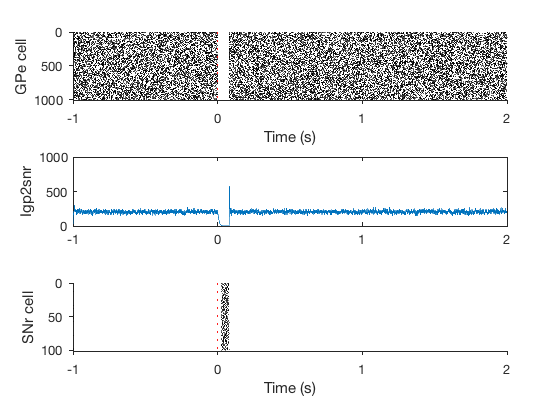

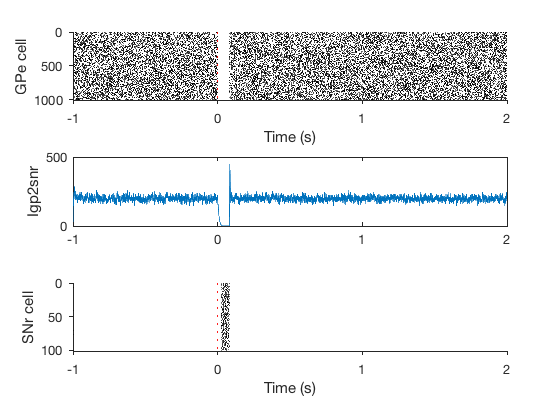

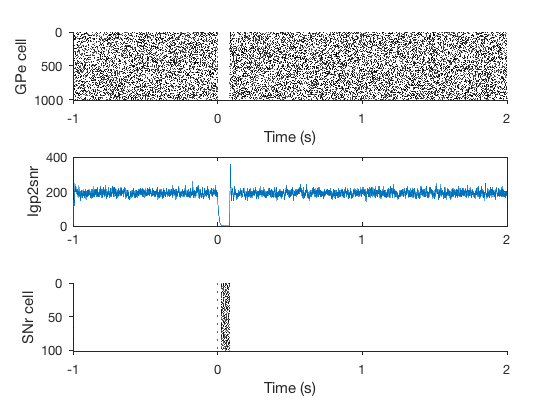

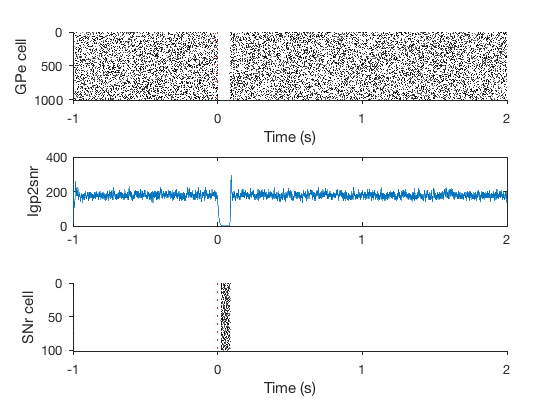

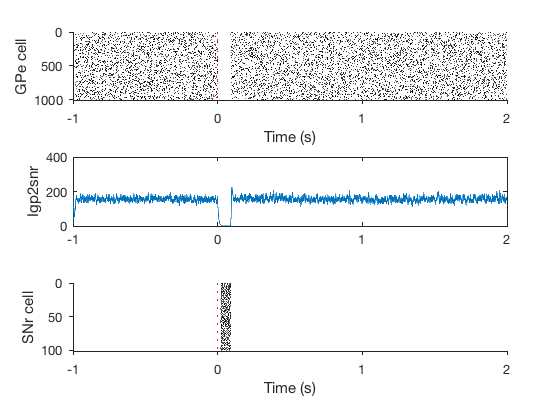

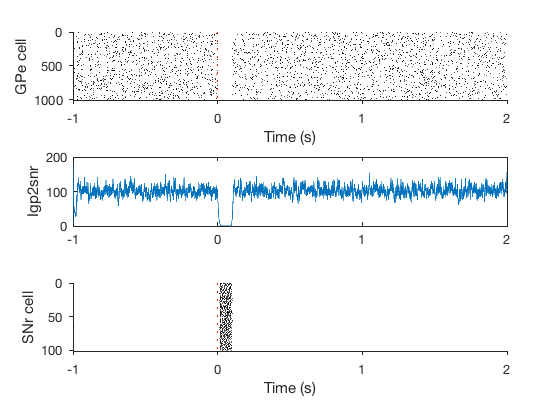

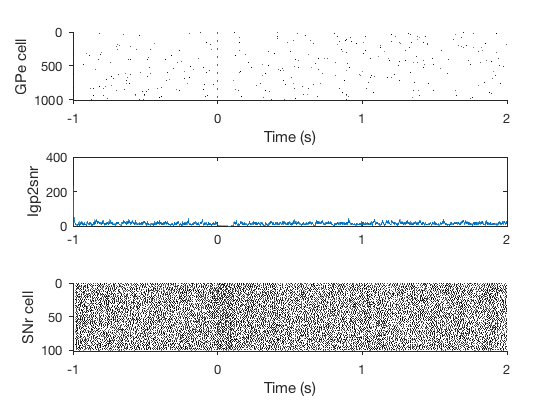

In [58]:
GPe_input = [40:10:100]; % pA, inhibitory
for i = 1:length(GPe_input)
%Runs 20s simulation without any stimulus to measure steady-state values. 
[g_gp2snr] = BGdelayline_setinit2('I_exc_gp',GPe_input(i),'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

spk_gp = [];
spk_snr=[];
dt=0.0001; % 0.1ms integration steps

[Vm_gp, Vm_snr, Isyn_out] = BGdelayline_GPe2SNr('Iexc_snr',90,'Iexc_gp',GPe_input(i),'g_gp2snr_i',g_gp2snr,'n',1000,'connectivity','all'); % only SNr layer. 100 neurons
spk_snr = [spk_snr; Vm_snr==15];
spk_gp = [spk_gp ; Vm_gp ==15];

figure(i)

subplot(3,1,1)
plotRaster(spk_gp);
vline(1)

ylabel('GPe cell')
xlim([0 3])
xticks([0 1 2 3])
xticklabels({'-1','0','1','2'})

subplot(3,1,2)
plot(linspace(0,3,size(Isyn_out,2)),Isyn_out(1,:))
xlim([0 3])
xticks([0 1 2 3])
xticklabels({'-1','0','1','2'})
ylabel('Igp2snr')

subplot(3,1,3)
plotRaster(spk_snr);
vline(1)
xlabel('Time (s)')
ylabel('SNr cell')
xlim([0 3])
xticks([0 1 2 3])
xticklabels({'-1','0','1','2'})
end


Then, I simulated the same network with only 10 upstream inputs arriving at each SNr cell, in random connection.

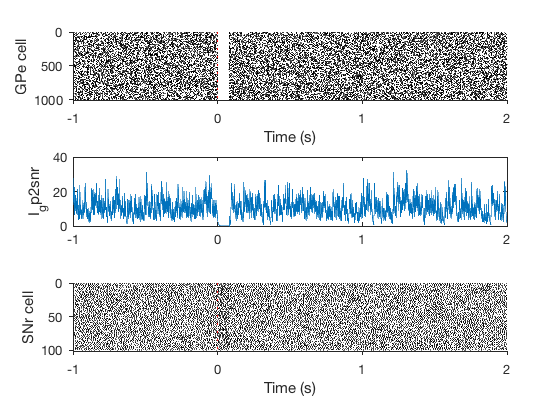

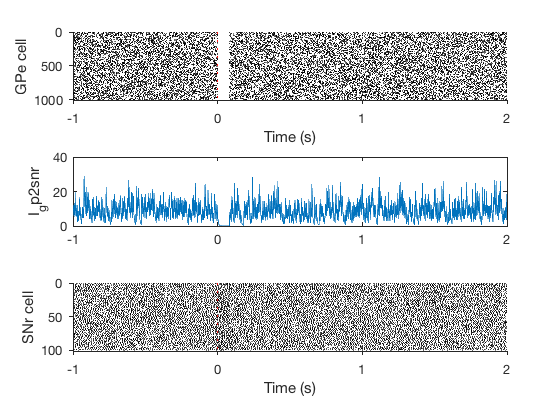

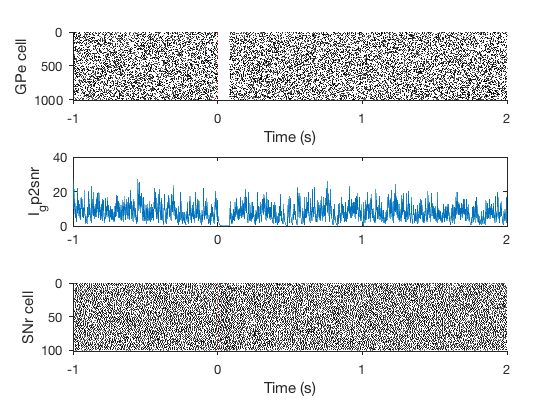

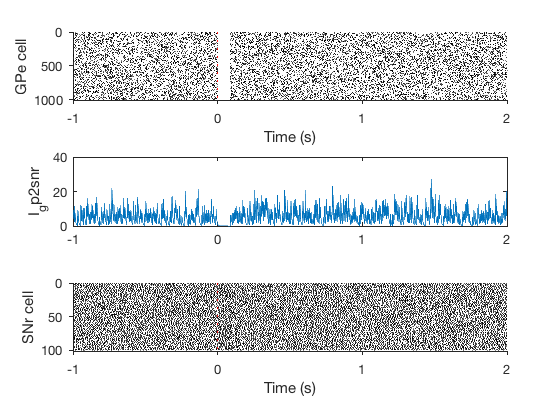

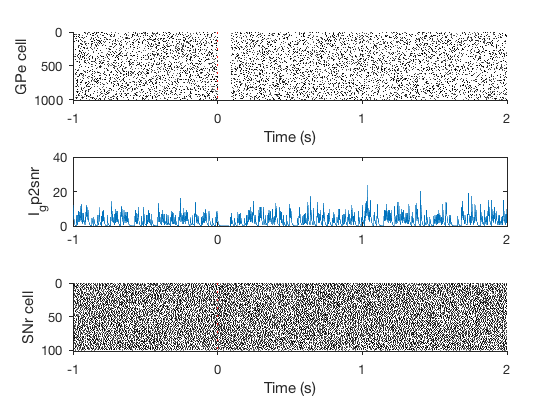

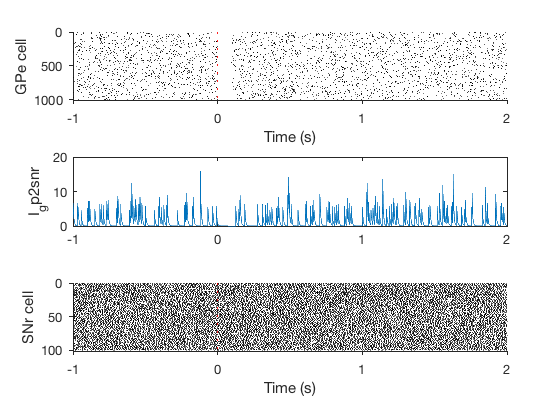

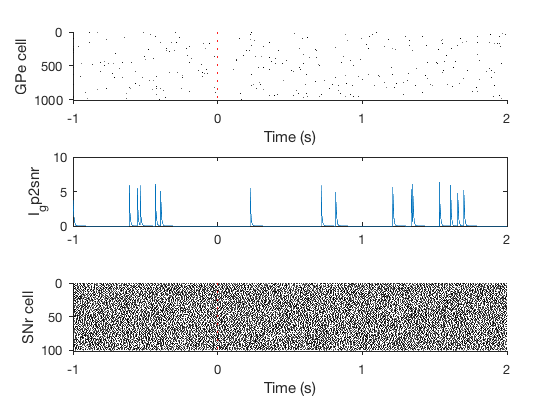

In [52]:
GPe_input = [40:10:100]; % pA, inhibitory
for i = 1:length(GPe_input)
%Runs 20s simulation without any stimulus to measure steady-state values. 
[g_gp2snr] = BGdelayline_setinit2('I_exc_gp',GPe_input(i),'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

spk_gp = [];
spk_snr=[];
dt=0.0001; % 0.1ms integration steps

[Vm_gp, Vm_snr, Isyn_out] = BGdelayline_GPe2SNr('Iexc_snr',90,'Iexc_gp',GPe_input(i),'g_gp2snr_i',g_gp2snr,'n',1000,'connectivity','random'); % only SNr layer. 100 neurons
spk_snr = [spk_snr; Vm_snr==15];
spk_gp = [spk_gp ; Vm_gp ==15];

figure(i)

subplot(3,1,1)
plotRaster(spk_gp);
vline(1)

ylabel('GPe cell')
xlim([0 3])
xticks([0 1 2 3])
xticklabels({'-1','0','1','2'})

subplot(3,1,2)
plot(linspace(0,3,size(Isyn_out,2)),Isyn_out(1,:))
xlim([0 3])
xticks([0 1 2 3])
xticklabels({'-1','0','1','2'})
ylabel('I_gp2snr')

subplot(3,1,3)
plotRaster(spk_snr);
vline(1)
xlabel('Time (s)')
ylabel('SNr cell')
xlim([0 3])
xticks([0 1 2 3])
xticklabels({'-1','0','1','2'})

end


Next, 10 upstream inputs arriving at each SNr cell, in segregated connection.

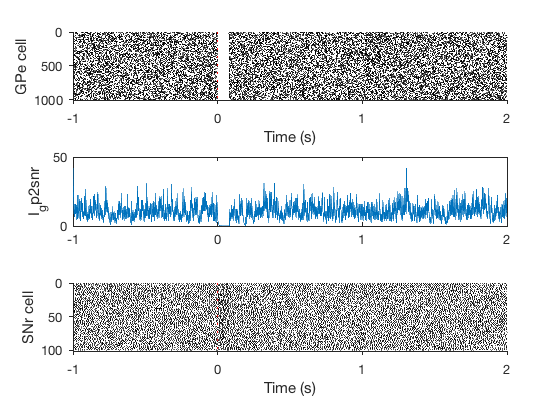

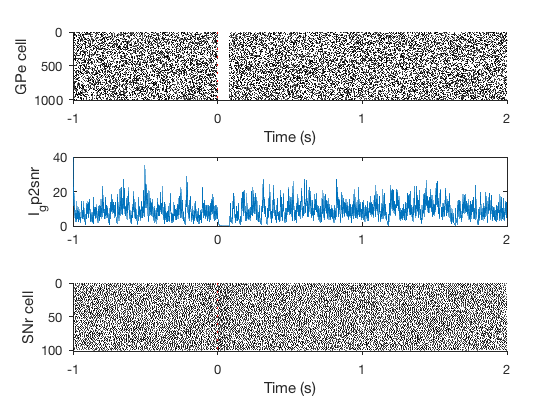

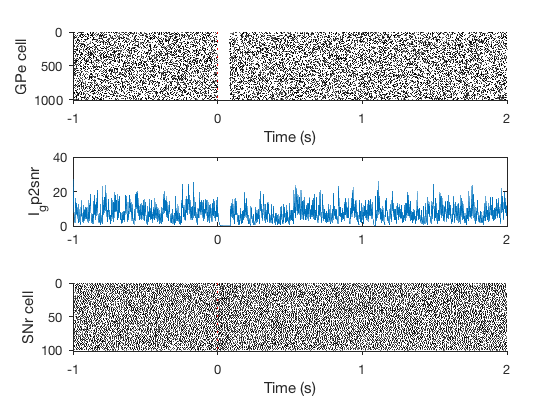

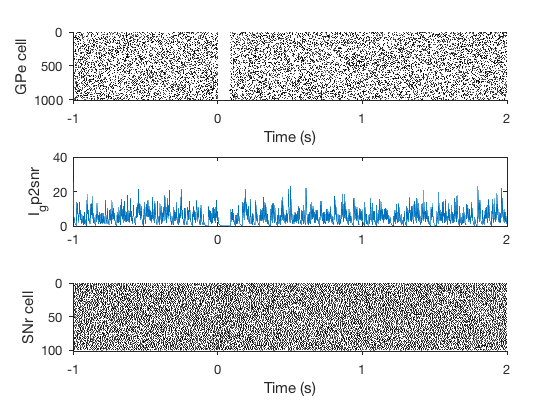

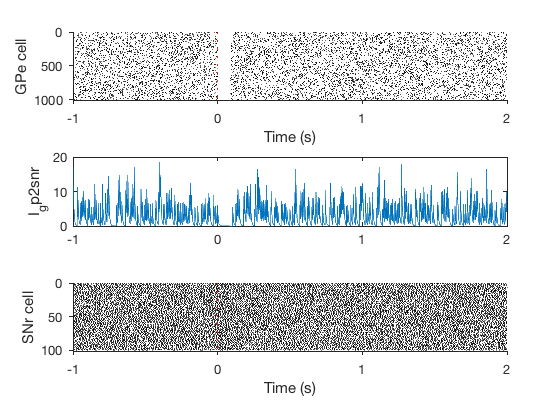

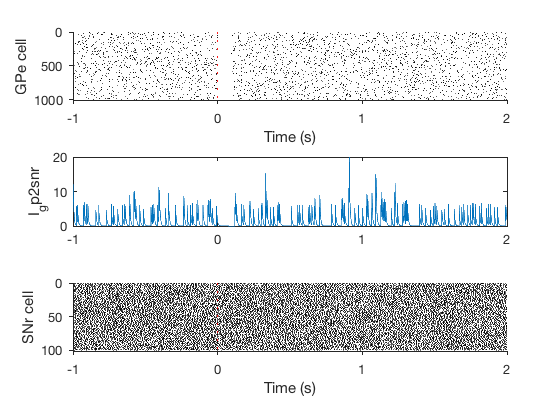

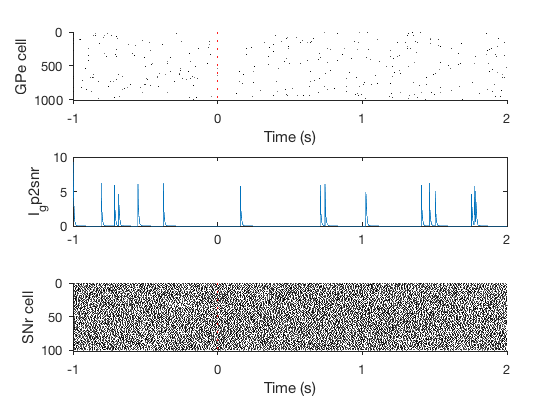

In [53]:
GPe_input = [40:10:100]; % pA, inhibitory
for i = 1:length(GPe_input)
%Runs 20s simulation without any stimulus to measure steady-state values. 
[g_gp2snr] = BGdelayline_setinit2('I_exc_gp',GPe_input(i),'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

spk_gp = [];
spk_snr=[];
dt=0.0001; % 0.1ms integration steps

[Vm_gp, Vm_snr, Isyn_out] = BGdelayline_GPe2SNr('Iexc_snr',90,'Iexc_gp',GPe_input(i),'g_gp2snr_i',g_gp2snr,'n',1000,'connectivity','segregated'); % only SNr layer. 100 neurons
spk_snr = [spk_snr; Vm_snr==15];
spk_gp = [spk_gp ; Vm_gp ==15];

figure(i)

subplot(3,1,1)
plotRaster(spk_gp);
vline(1)

ylabel('GPe cell')
xlim([0 3])
xticks([0 1 2 3])
xticklabels({'-1','0','1','2'})

subplot(3,1,2)
plot(linspace(0,3,size(Isyn_out,2)),Isyn_out(1,:))
xlim([0 3])
xticks([0 1 2 3])
xticklabels({'-1','0','1','2'})
ylabel('I_gp2snr')

subplot(3,1,3)
plotRaster(spk_snr);
vline(1)
xlabel('Time (s)')
ylabel('SNr cell')
xlim([0 3])
xticks([0 1 2 3])
xticklabels({'-1','0','1','2'})

end


### How does GPe pause affect SNr response times?

I added conductance based inhibitory synapses from GPe to SNr. Applied constant excitation( varying) and inhibition via GPe firing until stimulus time t=1 (for 10ms), at which I will inhibit all the GPe cells.

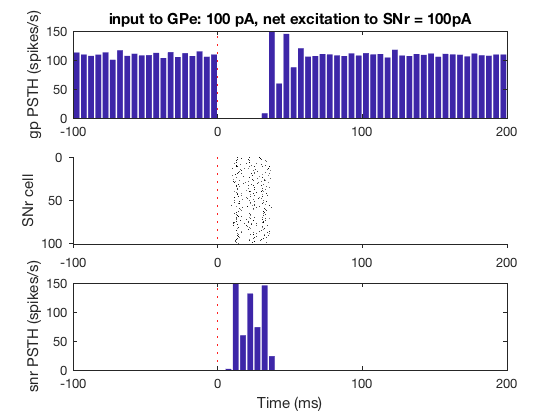

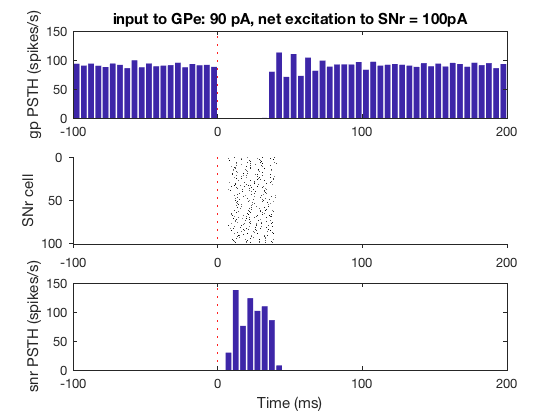

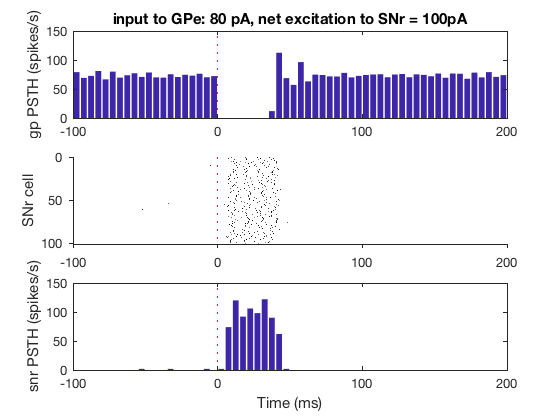

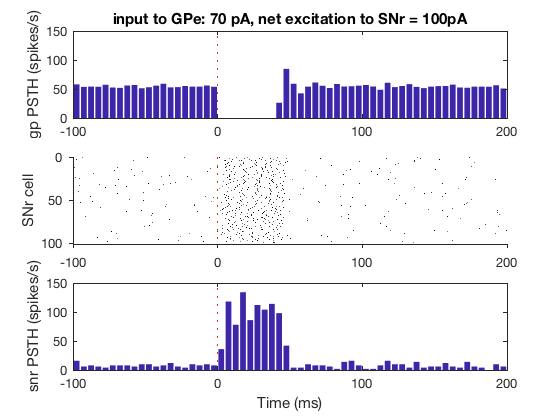

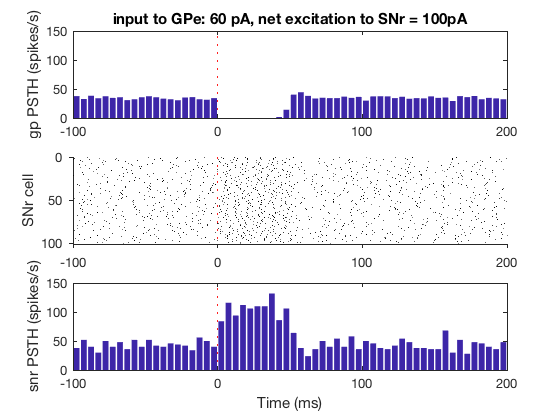

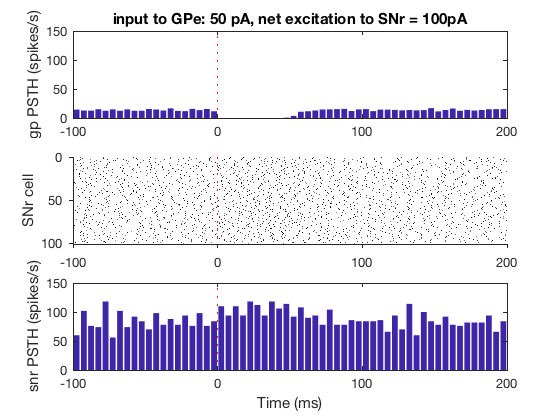

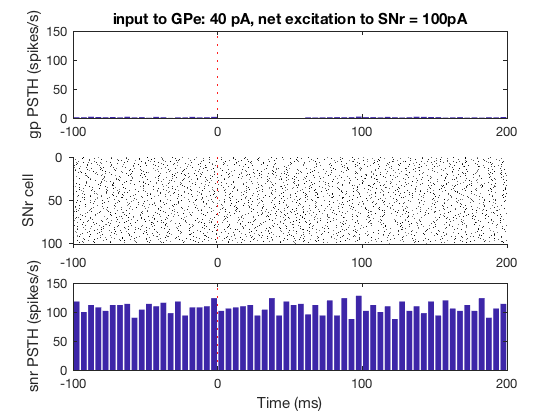

In [74]:
GPe_input = 40:10:100; % pA, inhibitory
for i = 1:length(GPe_input)
%Runs 20s simulation without any stimulus to measure steady-state values. 
[g_gp2snr] = BGdelayline_setinit2('I_exc_gp',GPe_input(i),'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

spk_gp = [];
spk_snr=[];
dt=0.0001; % 0.1ms integration steps

for l = 1:10
[Vm_gp, Vm_snr] = BGdelayline_GPe2SNr('Iexc_snr',100,'Iexc_gp',GPe_input(i),'g_gp2snr_i',g_gp2snr,'n',100,'connectivity','all'); % only SNr layer. 100 neurons
spk_snr = [spk_snr; Vm_snr==15];
spk_gp = [spk_gp ; Vm_gp ==15];
end

binWidth = 50; % bin size, scale of 0.1ms

t_bar = 1:binWidth:length(spk_snr);
psth_snr = zeros(1,length(t_bar));
psth_gp = zeros(1,length(t_bar));

for psth_i = 1:length(t_bar)-1

    psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
    
end

figure(i)
subplot(3,1,1)
bar((binWidth/2+t_bar-1)*0.0001,psth_gp/(size(spk_gp,1)*(binWidth*0.0001)))
ylabel('gp PSTH (spikes/s)')
ylim([0 150])
vline(1)
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
title(sprintf('input to GPe: %d pA, net excitation to SNr = 100pA',GPe_input(i)))

subplot(3,1,2)
plotRaster(spk_snr);
vline(1)
ylabel('SNr cell')
xlabel('')
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})


subplot(3,1,3)
bar((binWidth/2+t_bar-1)*0.0001,psth_snr/(size(spk_snr,1)*(binWidth*0.0001)))
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
ylim([0 150])
vline(1)
ylabel('snr PSTH (spikes/s)')
xlabel('Time (ms)')
end


In reduced synaptic connection model, 

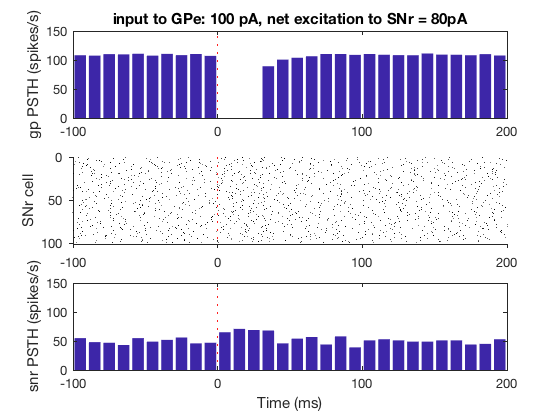

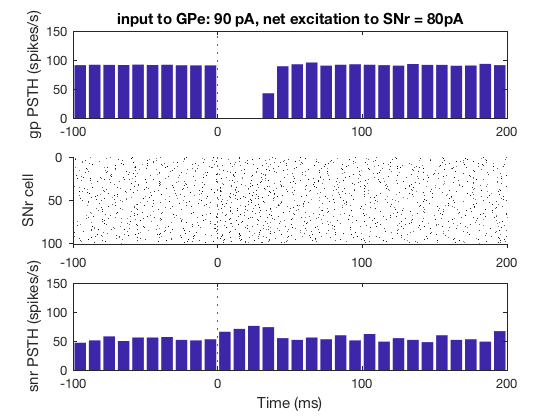

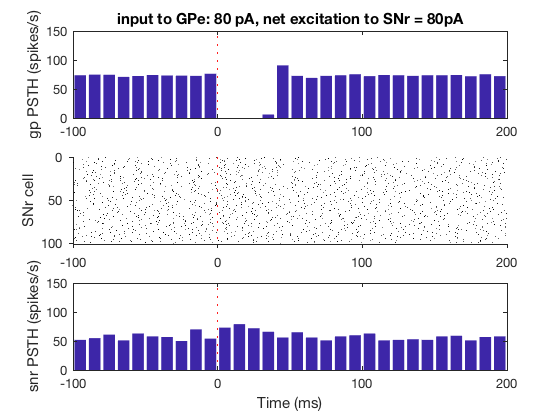

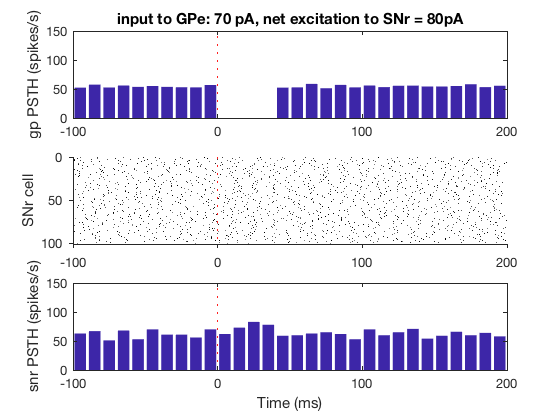

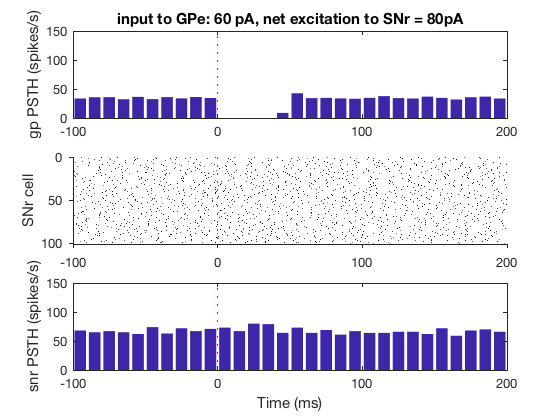

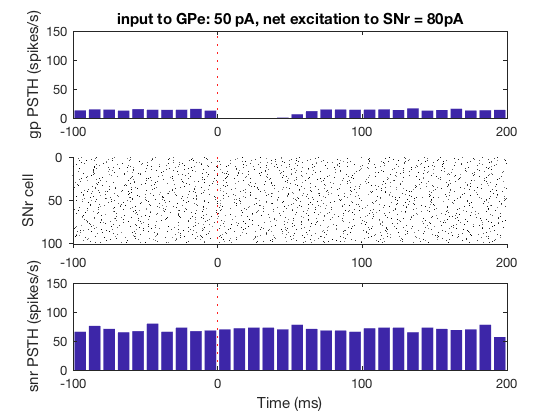

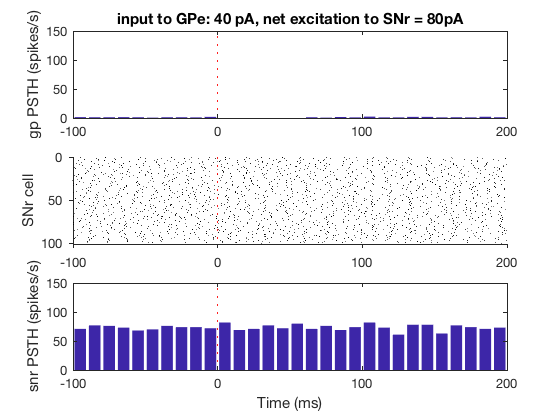

In [69]:
GPe_input = 40:10:100; % pA, inhibitory
for i = 1:length(GPe_input)
%Runs 20s simulation without any stimulus to measure steady-state values. 
[g_gp2snr] = BGdelayline_setinit2('I_exc_gp',GPe_input(i),'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

spk_gp = [];
spk_snr=[];
dt=0.0001; % 0.1ms integration steps

for l =1:10
[Vm_gp, Vm_snr] = BGdelayline_GPe2SNr('Iexc_snr',80,'Iexc_gp',GPe_input(i),'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr,'n',100,'connectivity','random'); % only SNr layer. 100 neurons
spk_snr = [spk_snr; Vm_snr==15];
spk_gp = [spk_gp ; Vm_gp ==15];
end

binWidth = 100; % bin size, scale of 0.1ms

t_bar = 1:binWidth:length(spk_snr);
psth_snr = zeros(1,length(t_bar));
psth_gp = zeros(1,length(t_bar));

for psth_i = 1:length(t_bar)-1

    psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
    
end

figure(i)
subplot(3,1,1)
bar((binWidth/2+t_bar-1)*0.0001,psth_gp/(size(spk_gp,1)*(binWidth*0.0001)))
ylabel('gp PSTH (spikes/s)')
ylim([0 150])
vline(1)
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
title(sprintf('input to GPe: %d pA, net excitation to SNr = 80pA',GPe_input(i)))

subplot(3,1,2)
plotRaster(spk_snr);
vline(1)
ylabel('SNr cell')
xlabel('')
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})


subplot(3,1,3)
bar((binWidth/2+t_bar-1)*0.0001,psth_snr/(size(spk_snr,1)*(binWidth*0.0001)))
xlim([0.9 1.2])
xticks([0.9 1 1.1 1.2])
xticklabels({'-100','0','100','200'})
ylim([0 150])
vline(1)
ylabel('snr PSTH (spikes/s)')
xlabel('Time (ms)')
end



tdelay =

       NaN       NaN    1.0250    1.0250    1.0150    1.0150
       NaN       NaN       NaN    1.0250    1.0150    1.0250
       NaN       NaN       NaN    1.0150    1.0250    1.0250
    1.0150       NaN    1.0050    1.0350    1.0350    1.0150
       NaN       NaN       NaN    1.0050    1.0250    1.0250
       NaN       NaN    1.0050    1.0250    1.0250    1.0150
    1.0450       NaN    1.0350       NaN    1.0050    1.0250
       NaN       NaN    1.0350    1.0250    1.0350    1.0250
       NaN    1.0350       NaN    1.0150    1.0150    1.0150
       NaN       NaN    1.0250    1.0250    1.0050    1.0150



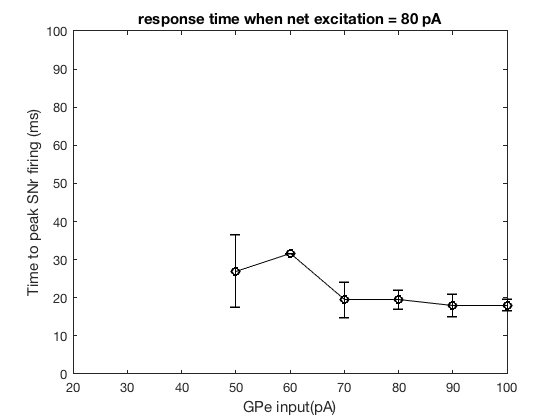

In [75]:
GPe_input = 50:10:100; % pA, inhibitory
tdelay = zeros(10,length(GPe_input));
for sim_i = 1:10 % number of simulations
    for i = 1:length(GPe_input)
        %Runs 20s simulation without any stimulus to measure steady-state values. 
        [g_gp2snr] = BGdelayline_setinit2('I_exc_gp',GPe_input(i),'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

        spk_gp = [];
        spk_snr=[];
        dt=0.0001; % 0.1ms integration steps
        
        for l =1:10
        [Vm_gp, Vm_snr] = BGdelayline_GPe2SNr('Iexc_snr',80,'Iexc_gp',GPe_input(i),'g_gp2snr_i',g_gp2snr,'n',100,'connectivity','random'); % only SNr layer. 100 neurons
        spk_snr = [spk_snr; Vm_snr==15];
        spk_gp = [spk_gp ; Vm_gp ==15];
        end
        
        binWidth = 100; % bin size, scale of 0.1ms

        t_bar = 1:binWidth:length(spk_snr);
        psth_snr = zeros(1,length(t_bar));
        psth_gp = zeros(1,length(t_bar));

        for psth_i = 1:length(t_bar)-1

            psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
            psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));

        end
        binloc = (binWidth/2+t_bar-1)*0.0001;
        
        [M,I]=max(psth_snr);

        if binloc(I)>1 & binloc(I)<1.2
            tdelay(sim_i,i) = binloc(I);
        else
            tdelay(sim_i,i) = NaN;
        end
        
    end
end

tdelay

e=errorbar(GPe_input,nanmean(tdelay,1),nanstd(tdelay,1)./sqrt(sum(~isnan(tdelay),1)));
e.Color = 'k';
e.Marker = 'o';
xlabel('GPe input(pA)')
ylabel('Time to peak SNr firing (ms)' )
xlim([20 100])
ylim([1 1.1])
yticks(linspace(1,1.1,10))
yticklabels({'0','10','20','30','40','50','60','80','90','100'})
title(sprintf('response time when net excitation = %d pA',80))



tdelay =

    1.0250    1.0350    1.0150    1.0350    1.0350    1.0250
    1.0450    1.0250    1.0150    1.0150    1.0150    1.0250
    1.0350    1.0350    1.0150    1.0150    1.0250    1.0250
    1.0450    1.0350    1.0250    1.0150    1.0350    1.0250
    1.0350    1.0250    1.0150    1.0350    1.0250    1.0250
    1.0450    1.0250    1.0150    1.0150    1.0350    1.0250
    1.0350    1.0350    1.0150    1.0150    1.0350    1.0250
    1.0350    1.0350    1.0150    1.0150    1.0150    1.0250
    1.0350    1.0350    1.0150    1.0150    1.0250    1.0250
    1.0250    1.0250    1.0150    1.0350    1.0350    1.0250



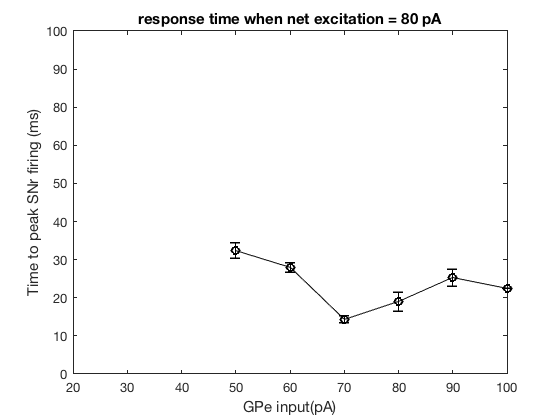

In [76]:
GPe_input = 50:10:100; % pA, inhibitory
tdelay = zeros(10,length(GPe_input));
for sim_i = 1:10 % number of simulations
    for i = 1:length(GPe_input)
        %Runs 20s simulation without any stimulus to measure steady-state values. 
        [g_gp2snr] = BGdelayline_setinit2('I_exc_gp',GPe_input(i),'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

        spk_gp = [];
        spk_snr=[];
        dt=0.0001; % 0.1ms integration steps
        
        for l =1:10
        [Vm_gp, Vm_snr] = BGdelayline_GPe2SNr('Iexc_snr',80,'Iexc_gp',GPe_input(i),'g_gp2snr_i',g_gp2snr,'n',100,'connectivity','all'); % only SNr layer. 100 neurons
        spk_snr = [spk_snr; Vm_snr==15];
        spk_gp = [spk_gp ; Vm_gp ==15];
        end
        
        binWidth = 100; % bin size, scale of 0.1ms

        t_bar = 1:binWidth:length(spk_snr);
        psth_snr = zeros(1,length(t_bar));
        psth_gp = zeros(1,length(t_bar));

        for psth_i = 1:length(t_bar)-1

            psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
            psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));

        end
        binloc = (binWidth/2+t_bar-1)*0.0001;
        
        [M,I]=max(psth_snr);

        if binloc(I)>1 & binloc(I)<1.2
            tdelay(sim_i,i) = binloc(I);
        else
            tdelay(sim_i,i) = NaN;
        end
        
    end
end

tdelay

e=errorbar(GPe_input,nanmean(tdelay,1),nanstd(tdelay,1)./sqrt(sum(~isnan(tdelay),1)));
e.Color = 'k';
e.Marker = 'o';
xlabel('GPe input(pA)')
ylabel('Time to peak SNr firing (ms)' )
xlim([20 100])
ylim([1 1.1])
yticks(linspace(1,1.1,10))
yticklabels({'0','10','20','30','40','50','60','80','90','100'})
title(sprintf('response time when net excitation = %d pA',80))


    50


tdelay =

       NaN    1.0350    1.0450       NaN    1.0350    1.0250       NaN
       NaN    1.0250    1.0250       NaN       NaN       NaN       NaN
       NaN    1.0450    1.0350    1.0350       NaN       NaN       NaN
       NaN    1.0450    1.0350       NaN       NaN    1.0350       NaN
       NaN    1.0250    1.0350    1.0350       NaN       NaN       NaN
       NaN    1.0450    1.0250       NaN       NaN       NaN       NaN
       NaN    1.0450    1.0350    1.0350       NaN    1.0350       NaN
       NaN    1.0550       NaN    1.0350       NaN       NaN       NaN
    1.0250    1.0350       NaN    1.0350    1.0350       NaN       NaN
       NaN    1.0250    1.0350       NaN       NaN    1.0350       NaN

    60


tdelay =

       NaN    1.0150    1.0250    1.0250    1.0350    1.0350    1.0250
       NaN    1.0150    1.0250    1.0350    1.0250    1.0350    1.0250
       NaN    1.0150    1.0350    1.0250    1.0350    1.0350    1.0250
       NaN    1.0150    1.0250    1.03

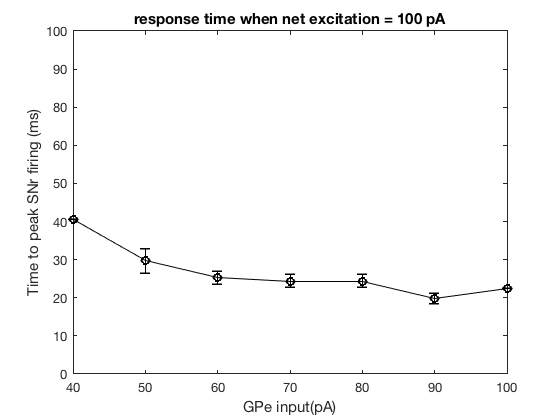

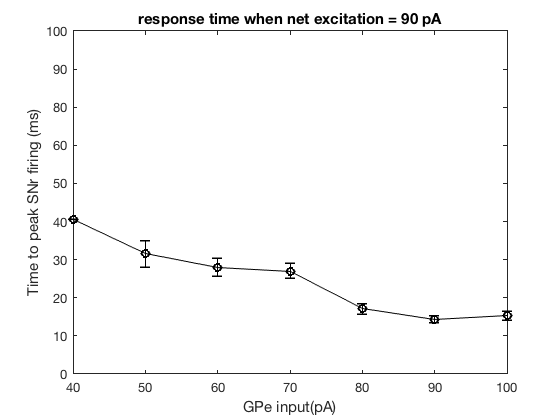

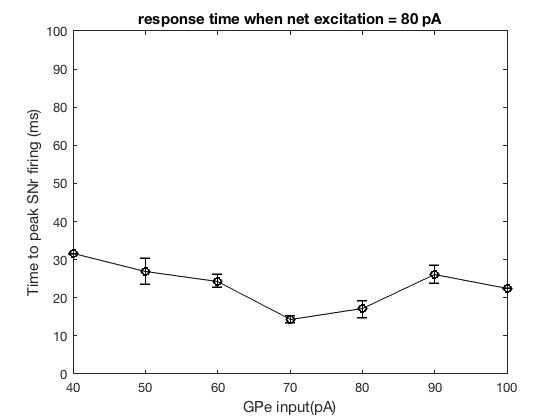

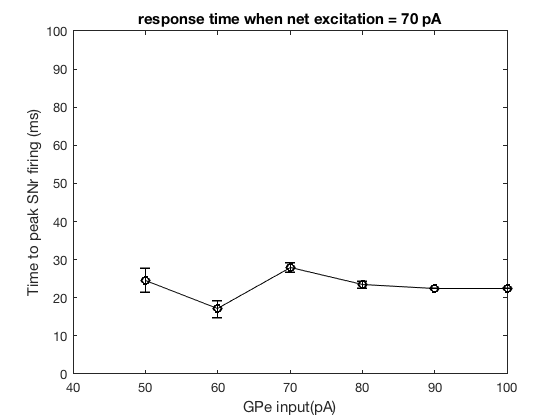

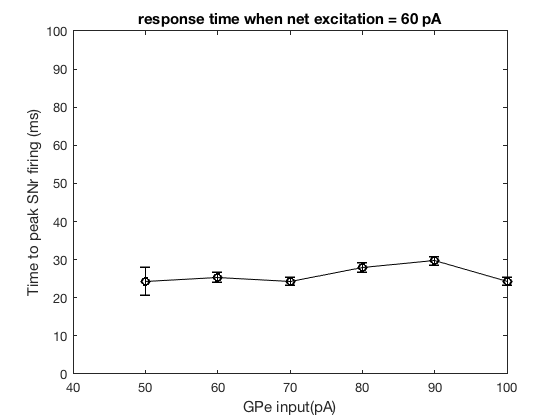

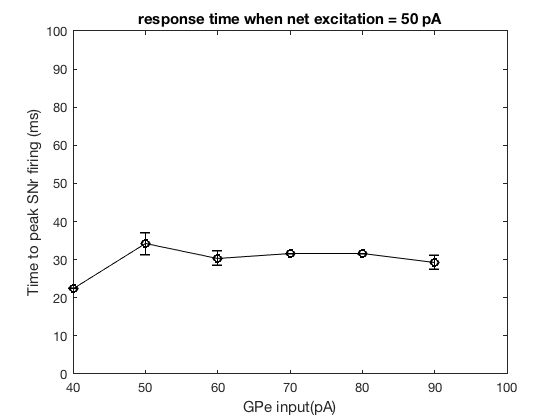

In [79]:
SNr_input = 50:10:100; 

for snr_i = 1:length(SNr_input)
    GPe_input = 40:10:100; % pA, inhibitory
    tdelay = zeros(10,length(GPe_input));
    for sim_i = 1:10 % number of simulations
        for i = 1:length(GPe_input)
            %Runs 20s simulation without any stimulus to measure steady-state values. 
            [g_gp2snr] = BGdelayline_setinit2('I_exc_gp',GPe_input(i),'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

            spk_gp = [];
            spk_snr=[];
            dt=0.0001; % 0.1ms integration steps

            for l =1:10
            [Vm_gp, Vm_snr] = BGdelayline_GPe2SNr('Iexc_snr',SNr_input(snr_i),'Iexc_gp',GPe_input(i),'g_gp2snr_i',g_gp2snr,'n',100,'connectivity','all'); % only SNr layer. 100 neurons
            spk_snr = [spk_snr; Vm_snr==15];
            spk_gp = [spk_gp ; Vm_gp ==15];
            end

            binWidth = 100; % bin size, scale of 0.1ms

            t_bar = 1:binWidth:length(spk_snr);
            psth_snr = zeros(1,length(t_bar));
            psth_gp = zeros(1,length(t_bar));

            for psth_i = 1:length(t_bar)-1

                psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
                psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));

            end
            binloc = (binWidth/2+t_bar-1)*0.0001;

            [M,I]=max(psth_snr);

            if binloc(I)>1 & binloc(I)<1.2
                tdelay(sim_i,i) = binloc(I);
            else
                tdelay(sim_i,i) = NaN;
            end

        end
    end
    
    disp(SNr_input(snr_i))
    tdelay
    figure(snr_i)
    e=errorbar(GPe_input,nanmean(tdelay,1),nanstd(tdelay,1)./sqrt(sum(~isnan(tdelay),1)));
    e.Color = 'k';
    e.Marker = 'o';
    xlabel('GPe input(pA)')
    ylabel('Time to peak SNr firing (ms)' )
    xlim([40 100])
    ylim([1 1.1])
    yticks(linspace(1,1.1,10))
    yticklabels({'0','10','20','30','40','50','60','80','90','100'})
    title(sprintf('response time when net excitation = %d pA',SNr_input(snr_i)))

end



    0.1000


tdelay =

       NaN       NaN    1.0150    1.0350    1.0350    1.0250    1.0250
       NaN    1.0050    1.0150    1.0250    1.0350    1.0150    1.0150
       NaN       NaN    1.0350    1.0150    1.0150    1.0350    1.0250
       NaN       NaN    1.0150    1.0250    1.0250    1.0250    1.0250
       NaN       NaN    1.0150    1.0350    1.0350    1.0150    1.0250
       NaN    1.0350    1.0450    1.0250    1.0350    1.0250    1.0150
       NaN    1.0350    1.0350    1.0150    1.0350    1.0150    1.0250
       NaN       NaN    1.0050    1.0350    1.0250    1.0250    1.0250
       NaN       NaN    1.0150    1.0150    1.0350    1.0350    1.0250
       NaN       NaN    1.0150    1.0350    1.0150    1.0350    1.0250

    0.2000


tdelay =

       NaN    1.0350    1.0250    1.0250    1.0250    1.0150    1.0150
       NaN    1.0550    1.0150    1.0250    1.0250    1.0150    1.0150
       NaN    1.0050    1.0350    1.0350    1.0250    1.0150    1.0150
       NaN    1.0150    1.0450

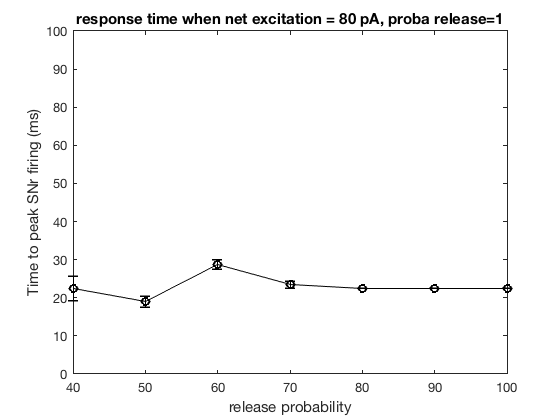

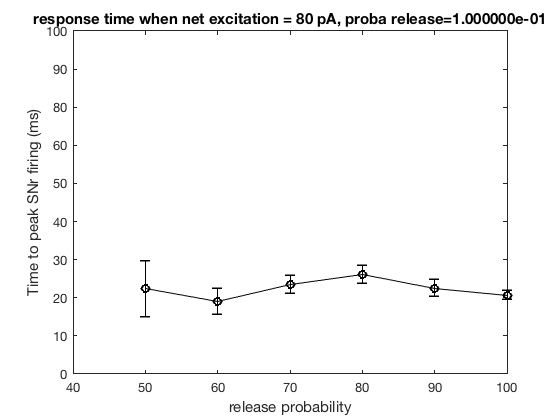

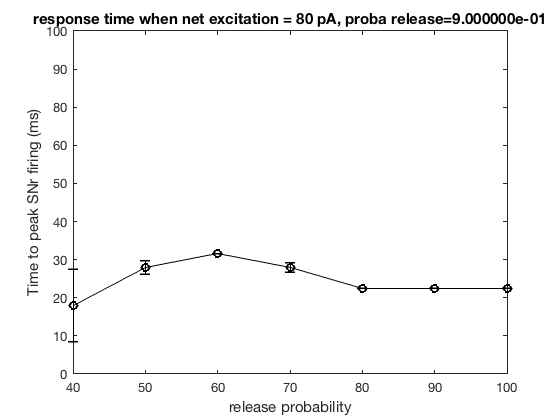

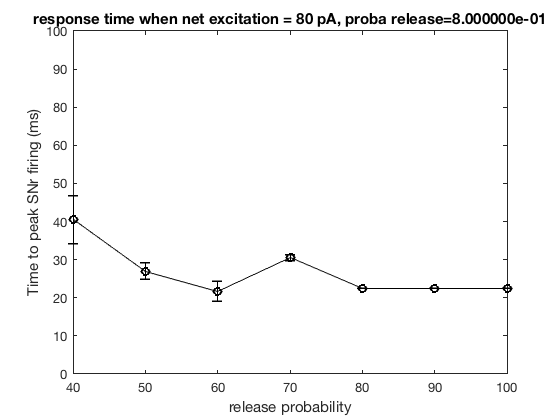

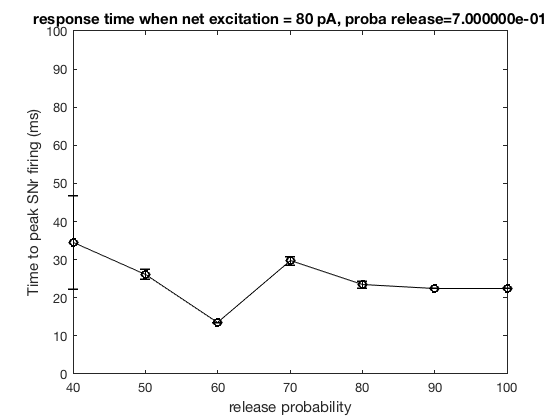

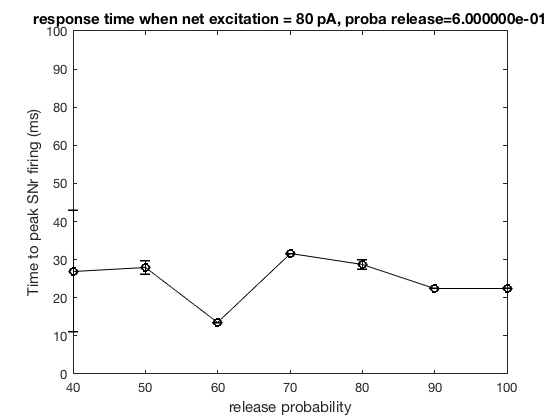

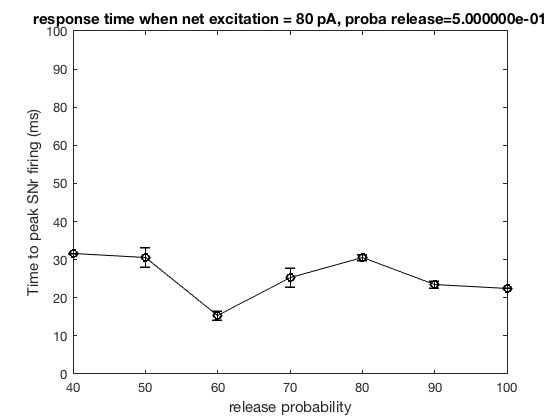

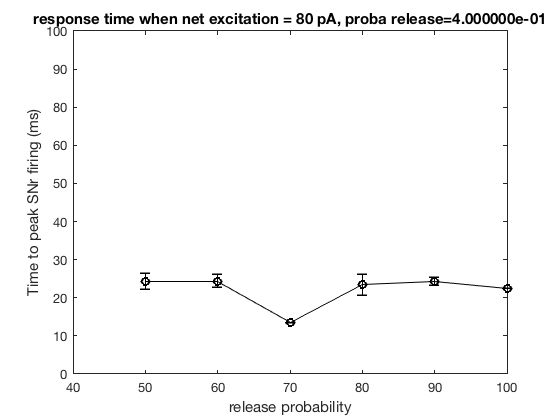

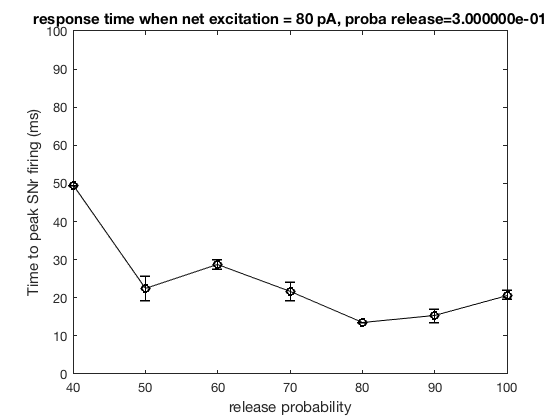

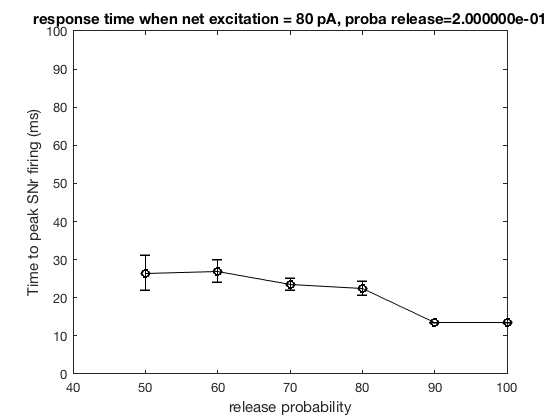

In [82]:
SNr_input = 50:10:100; 

prob_release = 0.1:0.1:1;

for p_i = 1:length(prob_release)
    GPe_input = 40:10:100; % pA, inhibitory
    tdelay = zeros(10,length(GPe_input));
    for sim_i = 1:10 % number of simulations
        for i = 1:length(GPe_input)
            %Runs 20s simulation without any stimulus to measure steady-state values. 
            [g_gp2snr] = BGdelayline_setinit2('I_exc_gp',GPe_input(i),'prob_syn_gp2snr',prob_release(p_i)); % initial conductance of gp to snr synapses 

            spk_gp = [];
            spk_snr=[];
            dt=0.0001; % 0.1ms integration steps

            for l =1:10
            [Vm_gp, Vm_snr] = BGdelayline_GPe2SNr('Iexc_snr',80,'Iexc_gp',GPe_input(i),...
            'g_gp2snr_i',g_gp2snr,'n',100,'connectivity','all','prob_syn_gp2snr',prob_release(p_i)); % only SNr layer. 100 neurons
            spk_snr = [spk_snr; Vm_snr==15];
            spk_gp = [spk_gp ; Vm_gp ==15];
            end

            binWidth = 100; % bin size, scale of 0.1ms

            t_bar = 1:binWidth:length(spk_snr);
            psth_snr = zeros(1,length(t_bar));
            psth_gp = zeros(1,length(t_bar));

            for psth_i = 1:length(t_bar)-1

                psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));
                psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar(psth_i):(t_bar(psth_i)+binWidth-1))));

            end
            binloc = (binWidth/2+t_bar-1)*0.0001;

            [M,I]=max(psth_snr);

            if binloc(I)>1 & binloc(I)<1.2
                tdelay(sim_i,i) = binloc(I);
            else
                tdelay(sim_i,i) = NaN;
            end

        end
    end
    
    disp(prob_release(p_i))
    tdelay
    figure(p_i)
    e=errorbar(GPe_input,nanmean(tdelay,1),nanstd(tdelay,1)./sqrt(sum(~isnan(tdelay),1)));
    e.Color = 'k';
    e.Marker = 'o';
    xlabel('release probability')
    ylabel('Time to peak SNr firing (ms)' )
    xlim([40 100])
    ylim([1 1.1])
    yticks(linspace(1,1.1,10))
    yticklabels({'0','10','20','30','40','50','60','80','90','100'})
    title(sprintf('response time when net excitation = 80 pA, proba release=%d' ,prob_release(p_i)))

end



## Is it faster to perform simulation for 1000 cells vs. 100 cells for 10 times?


## Next steps

1) Plot response time vs. net inhibition to SNr (while total current is fixed at a constant value) -> expect that response time does not differ because basal firing rate will be the same. 

2) Analyze the how SNr response changes depending on dI/dt (inhibitory current). I hypothesize that firing rate of GPe determines the dI/dt, which affects excitability of neurons.
